In [168]:
# Импортируем нужные нам библиотеки
from sklearn import (metrics, model_selection as skms, naive_bayes,
                     neighbors, tree, gaussian_process, neural_network, 
                     preprocessing, linear_model, svm)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [130]:
# Загружаем CSV файл и удаляем неинтересующие нас колонки
dataframe = pd.read_csv('marketing_campaign.csv', delimiter='\t')
dataframe = dataframe.drop(['ID','Dt_Customer'], axis=1)

In [131]:
# Производим кодирование текстовых признаков
scaler_encoder = preprocessing.OrdinalEncoder(encoded_missing_value=-1)
dataframe[['Education', 'Marital_Status']]=scaler_encoder.fit_transform(dataframe[['Education', 'Marital_Status']])

In [132]:
# Удаляем строки в которых остались значения не являющиеся числом
dataframe = dataframe.dropna()
np.argwhere(np.isnan(dataframe))

array([], shape=(0, 2), dtype=int64)

In [133]:
# Определяем колонки с данными и колонку с признаком
dataframe_data = dataframe.drop('Response', axis=1)
dataframe_target = dataframe['Response']

In [134]:
# Разбиваем наши данные на тренировочную и тестовую выборку в соотношении 80/20
(dataframe_train_ftrs, dataframe_test_ftrs,
 dataframe_train_tgt, dataframe_test_tgt) = skms.train_test_split(dataframe_data,
                                                                   dataframe_target,
                                                                   test_size=0.2,
                                                                   random_state=42)

In [135]:
# Производим нормализацию данных
scaler = preprocessing.StandardScaler()

dataframe_train_ftrs_scaled = scaler.fit_transform(dataframe_train_ftrs)
dataframe_test_ftrs_scaled = scaler.transform(dataframe_test_ftrs)

In [136]:
# Определяем модели для их дальнейшего сравнения
models = {'K nearest neighbors': neighbors.KNeighborsClassifier(),
          'Naive bayes': naive_bayes.GaussianNB(),
          'Decision tree': tree.DecisionTreeClassifier(),
          'Linear model': linear_model.RidgeClassifier(),
          'Support Vector Machines': svm.SVC(),
          'Stochastic Gradient Descent': linear_model.SGDClassifier(),
          'Gauss': gaussian_process.GaussianProcessClassifier(),
          'Neural network': neural_network.MLPClassifier()}

In [137]:
# Производим тренировку и выводим метрику для каждой модели
for name, model in models.items():
    fit = model.fit(dataframe_train_ftrs_scaled, dataframe_train_tgt)
    predictions = fit.predict(dataframe_test_ftrs_scaled)

    score = metrics.accuracy_score(dataframe_test_tgt, predictions)
    print("{}: {}".format(name, score))

K nearest neighbors: 0.8716216216216216
Naive bayes: 0.8018018018018018
Decision tree: 0.8536036036036037
Linear model: 0.8738738738738738
Support Vector Machines: 0.8761261261261262
Stochastic Gradient Descent: 0.8648648648648649
Gauss: 0.8873873873873874
Neural network: 0.8896396396396397


c:\Users\crazy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


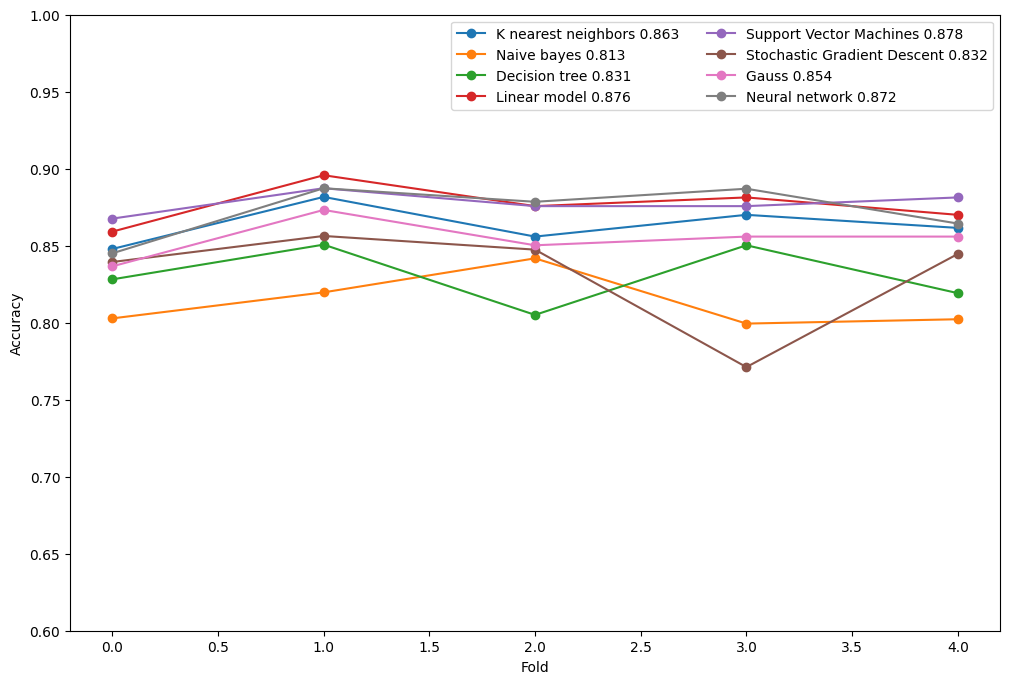

In [181]:
fig, ax = plt.subplots(figsize=(12,8))

for name, model in models.items():
    cv_scores = skms.cross_val_score(model,
                                     dataframe_train_ftrs_scaled, dataframe_train_tgt, 
                                     cv=5, scoring='accuracy',
                                     n_jobs=-1)
    my_lbl = "{} {:.3f}".format(name, cv_scores.mean())
    ax.plot(cv_scores, '-o', label=my_lbl) # marker=next(markers)

ax.set_ylim(0.6, 1.0)
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.legend(ncol=2);